# <font color = 'blue'> Experimentation on Alexnet for Fashion MNIST data set

In [ ]:
**Installing and Importing required modules**

In [ ]:
!pip install d2l==0.16.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from d2l import torch as d2l
import torch
from torch import nn

# <font color = 'blue'> Alexnet


In [ ]:

net = nn.Sequential(
    # Here, I use a larger 11 x 11 window to capture objects. At the same
    # time, I use a stride of 4 to greatly reduce the height and width of the
    # output. Here, the number of output channels is much larger than that in
    # LeNet
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # Make the convolution window smaller, set padding to 2 for consistent
    # height and width across the input and output, and increase the number of
    # output channels
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # Use three successive convolutional layers and a smaller convolution
    # window. Except for the final convolutional layer, the number of output
    # channels is further increased. Pooling layers are not used to reduce the
    # height and width of input after the first two convolutional layers
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    # Here, the number of outputs of the fully-connected layer is several
    # times larger than that in LeNet. Use the dropout layer to mitigate
    # overfitting
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    # Output layer. Since I am using Fashion-MNIST, the number of classes is
    # 10, instead of 1000 as in the paper
    nn.Linear(4096, 10))

I have constructed a single-channel data example with both height and width of 224 to observe the output shape of each layer. 


In [ ]:
X = torch.randn(1, 1, 224, 224)
for layer in net:
    X=layer(X)
    print(layer.__class__.__name__,'Output shape:\t',X.shape)

Conv2d Output shape:	 torch.Size([1, 96, 54, 54])
ReLU Output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d Output shape:	 torch.Size([1, 96, 26, 26])
Conv2d Output shape:	 torch.Size([1, 256, 26, 26])
ReLU Output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d Output shape:	 torch.Size([1, 256, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 256, 12, 12])
ReLU Output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d Output shape:	 torch.Size([1, 256, 5, 5])
Flatten Output shape:	 torch.Size([1, 6400])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1,

## Reading the Dataset

Although AlexNet is trained on ImageNet in the paper, I have used Fashion-MNIST here
since training an ImageNet model to convergence could take hours or days
even on a modern GPU.
One of the problems with applying AlexNet directly on Fashion-MNIST
is that its images have lower resolution ($28 \times 28$ pixels)
than ImageNet images.
To make things work, I have upsampled them to $224 \times 224$
(generally not a smart practice,
but I have done it here to be faithful to the AlexNet architecture).
I have performed this resizing with the `resize` argument in the `d2l.load_data_fashion_mnist` function.


In [ ]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

loss 0.328, train acc 0.881, test acc 0.879
5342.4 examples/sec on cuda:0


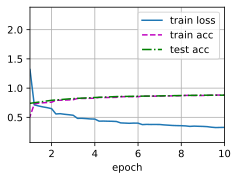

In [ ]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)

 

## <font color = 'blue'> 

<font color = 'blue'>  Alexnet was written for images of size 224x224. Clearly it is an overkill for the Fashion MNIST data set which has size 28x28. 

<font color = 'blue'> (i) Construct a model that mimics the architecture of Alexnet, but works directly on images of size 28x28. 

<font color = 'blue'> (ii) What is the accuracy reached? 

<font color = 'blue'> (iii) Also compare the running time of the new model with that of the original Alexnet on the resized images. 


(i) Construct a model that mimics the architecture of Alexnet, but works directly on images of size 28x28.

In [ ]:

net1 = nn.Sequential(
    # Here, I use a larger 11 x 11 window to capture objects. At the same
    # time, I use a stride of 4 to greatly reduce the height and width of the
    # output. Here, the number of output channels is much larger than that in
    # LeNet
    nn.Conv2d(1, 96, kernel_size=5, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # Make the convolution window smaller, set padding to 2 for consistent
    # height and width across the input and output, and increase the number of
    # output channels
    nn.Conv2d(96, 256, kernel_size=3, padding=2), nn.ReLU(),
    nn.BatchNorm2d(256),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # Use three successive convolutional layers and a smaller convolution
    # window. Except for the final convolutional layer, the number of output
    # channels is further increased. Pooling layers are not used to reduce the
    # height and width of input after the first two convolutional layers
    #nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    #nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    #nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    #nn.MaxPool2d(kernel_size=1, stride=2),
    nn.Flatten(),
    # Here, the number of outputs of the fully-connected layer is several
    # times larger than that in LeNet. Use the dropout layer to mitigate
    # overfitting
    nn.Linear(1024, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    # Output layer. Since I am using Fashion-MNIST, the number of classes is
    # 10, instead of 1000 as in the paper
    nn.Linear(4096, 10))

In [ ]:
X1 = torch.randn(1, 1, 28, 28)
for layer in net1:
    X1=layer(X1)
    print(layer.__class__.__name__,'Output shape:\t',X1.shape)

Conv2d Output shape:	 torch.Size([1, 96, 7, 7])
ReLU Output shape:	 torch.Size([1, 96, 7, 7])
MaxPool2d Output shape:	 torch.Size([1, 96, 3, 3])
Conv2d Output shape:	 torch.Size([1, 256, 5, 5])
ReLU Output shape:	 torch.Size([1, 256, 5, 5])
BatchNorm2d Output shape:	 torch.Size([1, 256, 5, 5])
MaxPool2d Output shape:	 torch.Size([1, 256, 2, 2])
Flatten Output shape:	 torch.Size([1, 1024])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1, 10])


In [ ]:
batch_size_1 = 128
train_iter_1, test_iter_1 = d2l.load_data_fashion_mnist(batch_size_1)

(ii) What is the accuracy reached?

loss 0.298, train acc 0.890, test acc 0.876
34010.8 examples/sec on cuda:0


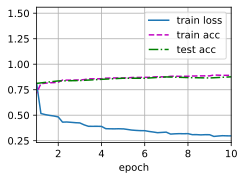

In [ ]:
lr_1, num_epochs_1 = 0.01, 10
d2l.train_ch6(net1, train_iter_1, test_iter_1, num_epochs_1, lr_1)

loss 0.233, train acc 0.913, test acc 0.890
34571.4 examples/sec on cuda:0


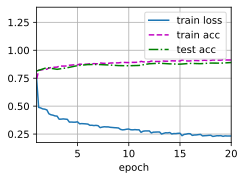

In [ ]:
lr_11, num_epochs_11 = 0.01, 20
d2l.train_ch6(net1, train_iter_1, test_iter_1, num_epochs_11, lr_11)

With 10 epochs, the training accuracy is 89% and the testing accuracy is 87.6%. With 20 epochs, the training accuracy is 91.3% and the testing accuracy is 89%.

(iii) Also compare the running time of the new model with that of the original Alexnet on the resized images.

Original Alexnet on the resized images took 8 min 47 sec to run.
My new Model on the original image took 1 min 31 sec to run with 10 epochs and 3 min 3 sec to run with 20 epochs.

 

## <font color = 'blue'>  <font>

<font color = 'blue'>   Now let's go back to the original Alexnet as well as the new model created above.

<font color = 'blue'>  (i) Train both the models for 50 epochs and record the training and test accuracy. 

<font color = 'blue'>  (ii) Take the MNIST dataloader and modify it, so that each image in the dataset gets a **random** label, in place of its correct label. 

<font color = 'blue'>  (iii) Retrain AlexNet with the new modified dataset. This time train it for 500 epochs. What is the training and test accuracy? 





New Model

(i) Train it for 50 epochs and record the training and test accuracy.

loss 0.118, train acc 0.955, test acc 0.884
34080.7 examples/sec on cuda:0


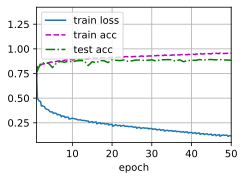

In [ ]:
lr_2, num_epochs_2 = 0.01, 50
d2l.train_ch6(net1, train_iter_1, test_iter_1, num_epochs_2, lr_2)

With 50 epochs, the training accuracy is 95.5% and testing accuracy is 88.4%.

(ii) Take the MNIST dataloader and modify it, so that each image in the dataset gets a random label, in place of its correct label.

The labels are randomized only for training data as test data should have correct labels representing real life data sets.

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
batch_size_2 = 60000
train_iter_2, test_iter_2 = d2l.load_data_fashion_mnist(batch_size_2)

In [ ]:

for x_batch, y_batch in train_iter_2:
  y_batch = torch.randint(0, 9, (60000,))
  x_batch = x_batch
  print(x_batch.shape)
  print(y_batch.shape)

torch.Size([60000, 1, 28, 28])
torch.Size([60000])


In [ ]:
for x_batch_t, y_batch_t in test_iter_2:
      print(y_batch_t.shape)
      print(x_batch_t.shape)

torch.Size([10000])
torch.Size([10000, 1, 28, 28])


In [ ]:
X_train_data = []
for i in range(len(x_batch)):
   X_train_data.append([x_batch[i], y_batch[i]])

In [ ]:
X_train_loader = DataLoader(dataset=X_train_data, batch_size=128, shuffle=True)

loss 2.194, train acc 0.128, test acc 0.082
38931.1 examples/sec on cuda:0


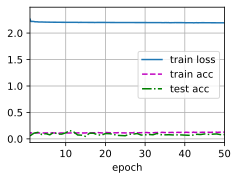

In [ ]:
lr_2, num_epochs_2 = 0.01, 50
d2l.train_ch6(net1, X_train_loader, test_iter_1, num_epochs_2, lr_2)

(iii) Retrain AlexNet with the new modified dataset. This time train it for 500 epochs. What is the training and test accuracy?

loss 0.036, train acc 0.988, test acc 0.094
38955.7 examples/sec on cuda:0


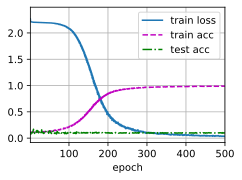

In [ ]:
lr_2, num_epochs_3 = 0.01, 500
d2l.train_ch6(net1, X_train_loader, test_iter_1, num_epochs_3, lr_2)

With 50 epochs, the training accuracy is 12.8% and the testing accuracy is 8.2%. 

With 500 epochs, the training accuracy is 98.8% and the testing accuracy is 9.4%.

Though I am seeing that the training accuracy has improved drastically with increasing number of epochs but the impact on testing accuracy is not significant.

Due to overfitting the training accuracy increased for the model with 500 epochs but test accuracy could not improve as the labels on the training dataset were randomized.

Original Alexnet model with resized images.

(i) Train it for 50 epochs and record the training and test accuracy.

loss 0.117, train acc 0.956, test acc 0.918
5527.1 examples/sec on cuda:0


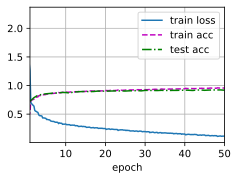

In [ ]:
lr_2, num_epochs_2 = 0.01, 50
d2l.train_ch6(net, train_iter, test_iter, num_epochs_2, lr_2)

With 50 epochs, the training accuracy is 95.6% and testing accuracy is 91.8%.

(ii) Take the MNIST dataloader and modify it, so that each image in the dataset gets a random label, in place of its correct label.

The labels are randomized only for training data as test data should have correct labels representing real life data sets.

In [ ]:
batch_size_2 = 60000
train_iter_3, test_iter_3 = d2l.load_data_fashion_mnist(batch_size_2, resize=224)

In [ ]:

for x_batch_2, y_batch_2 in train_iter_3:
  y_batch_2 = torch.randint(0, 9, (60000,))
  x_batch_2 = x_batch_2
  print(x_batch_2.shape)
  print(y_batch_2.shape)

torch.Size([60000, 1, 224, 224])
torch.Size([60000])


In [ ]:
X_train_data_2 = []
for i in range(len(x_batch_2)):
   X_train_data_2.append([x_batch_2[i], y_batch_2[i]])

In [ ]:
X_train_loader_2 = DataLoader(dataset=X_train_data_2, batch_size=128, shuffle=True)

loss 2.199, train acc 0.114, test acc 0.062
5850.2 examples/sec on cuda:0


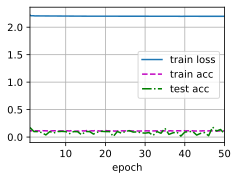

In [ ]:
lr_2, num_epochs_2 = 0.01, 50
d2l.train_ch6(net, X_train_loader_2, test_iter, num_epochs_2, lr_2)

(iii) Retrain AlexNet with the new modified dataset. This time train it for 500 epochs. What is the training and test accuracy?

loss 0.021, train acc 0.993, test acc 0.105
5794.0 examples/sec on cuda:0


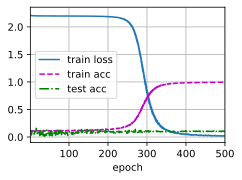

In [ ]:
lr_2, num_epochs_3 = 0.01, 500
d2l.train_ch6(net, X_train_loader_2, test_iter, num_epochs_3, lr_2)

With 50 epochs, the training accuracy is 11.4% and the testing accuracy is 6.2%.

With 500 epochs, the training accuracy is 99.3% and the testing accuracy is 10.5%.

Though I am seeing that the training accuracy has improved drastically with increasing number of epochs but the impact on testing accuracy is not significant.

Due to overfitting the training accuracy increased for the model with 500 epochs but test accuracy could not improve as the labels on the training dataset were randomized.